<a href="https://colab.research.google.com/github/Torm198/LabEst2021.1/blob/main/1_importacao_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando o Banco de Dados

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os # accessing directory structure
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [86]:
## Objetivo do trabalho: prever se uma pessoa irá cometer inadimplência no pagamento no próximo mês ou não

## Pacotes necessários para importar dados

import io
from google.colab import files

## Escolhendo o arquivo do meu computador

uploaded = files.upload()

dados = pd.read_excel(io.BytesIO(uploaded.get('default of credit card clients.xlsx')), header=1)

#dados = pd.read_excel('Dados\default of credit card clients.xls', header =1)

Saving default of credit card clients.xlsx to default of credit card clients (1).xlsx


In [87]:
## Renomeando PAY_0 to PAY_1 

dados.rename(columns={'default payment next month':'def_pay'}, inplace=True)

dados.rename(columns={'PAY_0':'PAY_1'}, inplace=True)


In [88]:
## Verificando estatísticas básicas

import numpy as np

dados.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [89]:
# Verificando os tipos das variáveis

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [90]:
# Mudando o tipo das variáveis que são categóricas
dados.SEX = dados.SEX.astype("category")
dados.EDUCATION = dados.EDUCATION.astype("category")
dados.MARRIAGE = dados.MARRIAGE.astype("category")
dados.PAY_1 = dados.PAY_1.astype("category")
dados.PAY_2 = dados.PAY_2.astype("category")
dados.PAY_3 = dados.PAY_3.astype("category")
dados.PAY_4 = dados.PAY_4.astype("category")
dados.PAY_5 = dados.PAY_5.astype("category")
dados.PAY_6 = dados.PAY_6.astype("category")

# Dados pessoais

O banco de dados consiste em 24 variáveis, sendo que as seis primeiras apresentam informações sobre dados pessoais dos clientes.

Essas estão codificadas da seguinte maneira:

1. ID: Código de cada cliente (variável catégorica nominal);
2. LIMIT_BAL: Quantidade de crédito disponivel em novos dólares Taiwaneses (variável númerica);
3. SEX: Indica o gênero, sendo 1 para homens e 2 para mulheres (variável catégorica nominal);
4. EDUCATION: Denota o nível educacional em números de 1 a 4, representando pós-graduação, nível superior, nível médio e outros, respectivamente (varíavel categórica ordinal);
5. MARRIAGE: Apresenta o estado civil com 1 para casado, 2 para solteiro e 3 para outros (varíavel categórica nominal);
6. AGE: Idade em anos (varíavel númerica).
7. PAY1 a PAY6: histórico de pagamentos (varíavel númerica).
8. BILL_AMT1 a BILL_AMT6: total da fatura (varíavel númerica).
9. PAY_AMT1 a PAY_AMT6: total do pagamento anterior (varíavel númerica).


## Nível de Inadimplência

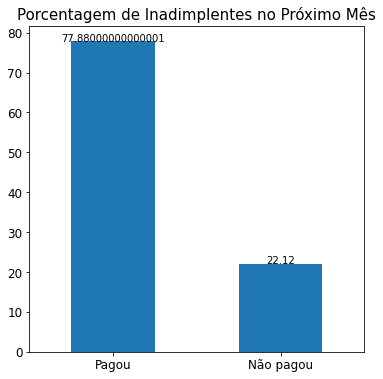

In [108]:
## De acordo com a base, verificando a quantidade de pessoas que irão realizar o pagamento no próximo mês

## Resultado: Há uma expectativa que 77% dos clientes irão realizar o pagamento e 23% não

dados["def_pay"].replace({0 : 'Pagou', 1:'Não pagou'}, inplace=True)

def_cnt = (dados.def_pay.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Porcentagem de Inadimplentes no Próximo Mês", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=10, horizontalalignment='center')
plt.show()

## Análise - Variável Gênero

In [109]:
# Distibuição de clientes por gênero

dados['SEX'].replace({1:'Masculino', 2:'Feminino'}, inplace=True)

dados['SEX'].value_counts(normalize = True)*100




Feminino     60.373333
Masculino    39.626667
Name: SEX, dtype: float64

## Análise - Variável Educação

In [94]:
## Analisando a variável educação

dados["EDUCATION"].value_counts(normalize = True)

2    0.467667
1    0.352833
3    0.163900
5    0.009333
4    0.004100
6    0.001700
0    0.000467
Name: EDUCATION, dtype: float64

Alterando as linhas que possuem níveis educacionais inválidos: valores 0, 5, 6 serão agrupados no grupo 'outros', representando pelo valor 4.

In [95]:
## Distribuição de clientes por nível educacional

dados['EDUCATION'].replace({1:'Pós-graduação', 2 : 'Nível superior', 3 : 'Nível médio', 4 : 'Outros'}, inplace=True)

dados.loc[dados['EDUCATION'] == 0, 'EDUCATION'] = 4
dados.loc[dados['EDUCATION'] == 5, 'EDUCATION'] = 4
dados.loc[dados['EDUCATION'] == 6, 'EDUCATION'] = 4

dados["EDUCATION"].value_counts(normalize = True)*100



Nível superior    46.766667
Pós-graduação     35.283333
Nível médio       16.390000
Outros             1.560000
Name: EDUCATION, dtype: float64

Text(0, 0.5, 'Frequência')

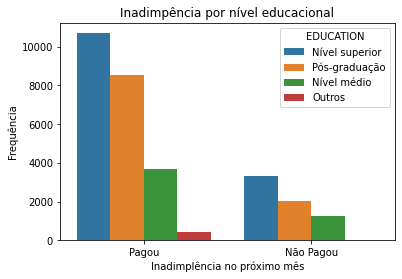

In [97]:
educacao_pagamento = sns.countplot(x = "def_pay",  
              hue = "EDUCATION",
              dodge = 1,
              data = dados)
educacao_pagamento.set_title('Inadimpência por nível educacional')
educacao_pagamento.set_xticklabels(["Pagou","Não Pagou"])
educacao_pagamento.set_xlabel('Inadimplência no próximo mês')
educacao_pagamento.set_ylabel('Frequência')

## Análise - Variável Estado Civil

In [99]:
## Analisando a variável estado civil

dados["MARRIAGE"].value_counts(normalize = True)


2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: MARRIAGE, dtype: float64

Modificando linhas que possuem o estado civil com valor 0 e incluindo no grupo outros, representado pelo valor 3.

In [100]:
dados.loc[dados['MARRIAGE'] == 0, 'MARRIAGE'] = 3

dados["MARRIAGE"].replace({1 : 'Casado', 2 : 'Solteiro', 3 : 'Outros'}, inplace=True)

dados["MARRIAGE"].value_counts(normalize = True)*100

Solteiro    53.213333
Casado      45.530000
Outros       1.256667
Name: MARRIAGE, dtype: float64

Text(0, 0.5, 'Frequência')

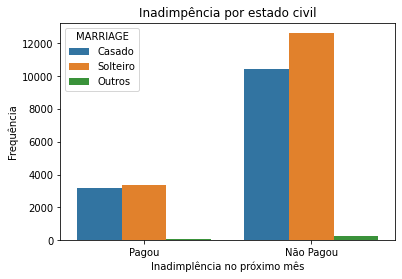

In [102]:
casamento_pagamento = sns.countplot(x = "def_pay",  
              hue = "MARRIAGE",
              dodge = 1,
              data = dados)
casamento_pagamento.set_title('Inadimpência por estado civil')
casamento_pagamento.set_xticklabels(["Pagou","Não Pagou"])
casamento_pagamento.set_xlabel('Inadimplência no próximo mês')
casamento_pagamento.set_ylabel('Frequência')

## Análise - Varíavel Idade

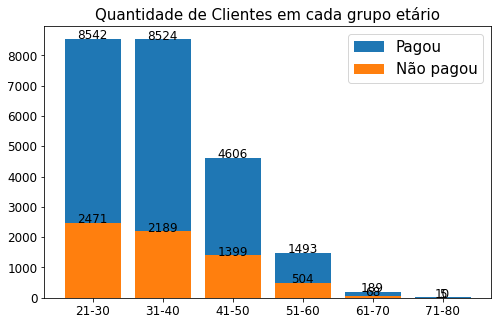

In [110]:
## Quantidade de pessoas que irão ou não realizar o pagamento por idade

bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
dados['AGE_BIN'] = pd.cut(x=dados.AGE, bins=bins, labels=names, right=True)

age_cnt = dados.AGE_BIN.value_counts()
age_0 = (dados.AGE_BIN[dados['def_pay'] == 'Pagou'].value_counts())
age_1 = (dados.AGE_BIN[dados['def_pay'] == 'Não pagou'].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=df, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(age_0.index, age_0.values, label='Pagou')
plt.bar(age_1.index, age_1.values, label='Não pagou')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12, horizontalalignment='center')
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12, horizontalalignment='center')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Quantidade de Clientes em cada grupo etário", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()



## Estado Civil x Idade

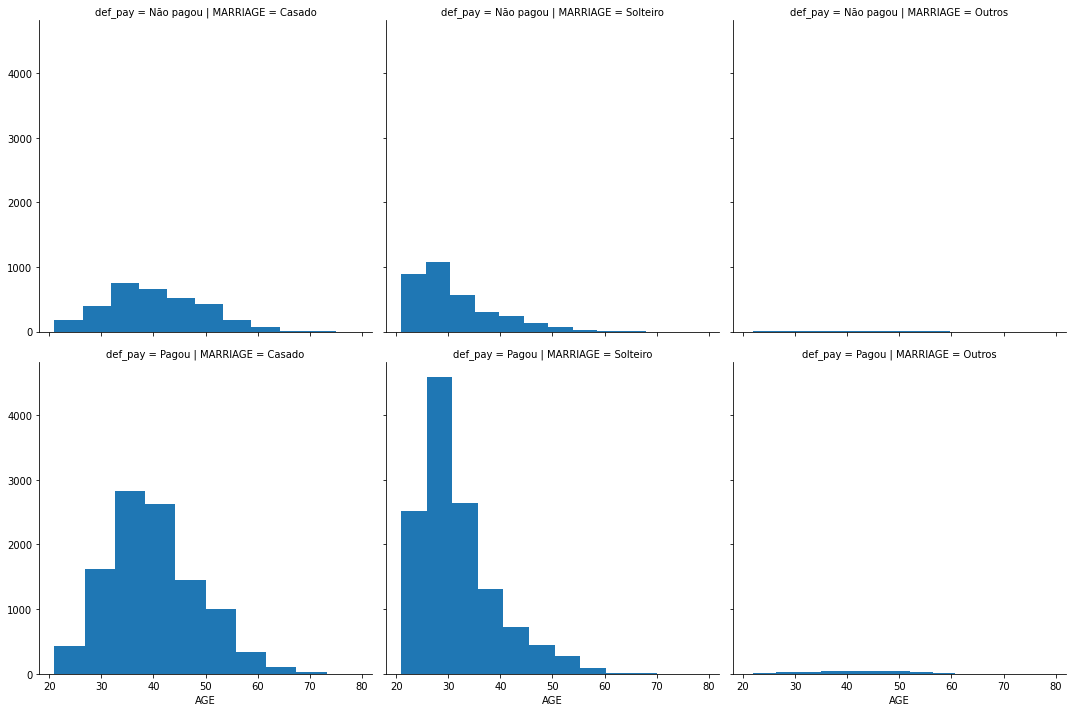

In [111]:
## Gráfico de barras por status civil e idade

## Resultado: pessoas casadas com 30 a 50 anos e solteiros com 20-30 são os principais clientes

g = sns.FacetGrid(dados, row='def_pay', col='MARRIAGE', height=5 )
g = g.map(plt.hist, 'AGE')
plt.show()

## Total de Crédito Recebido x Idade

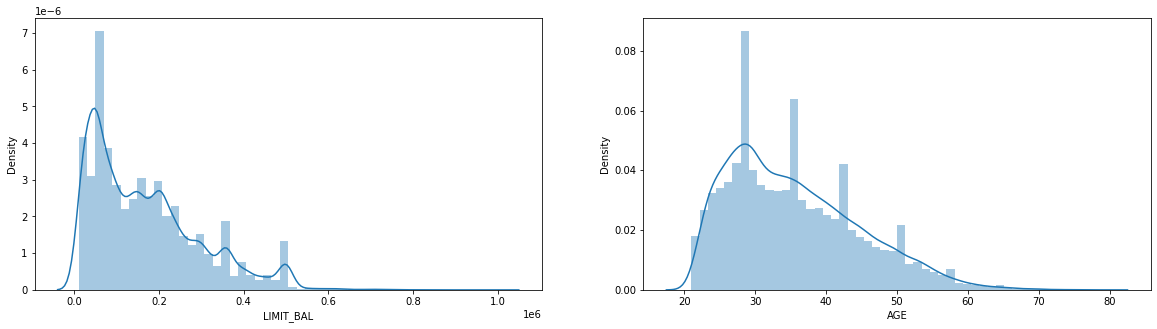

In [107]:
## Distribuição de variáveis contínuas: Idade e Total de crédito recebido

## Resultado: O maior número de clientes recebeu um crédito entre 10.000 e 200.000, e possuem entre 20 to 40
plt.subplots(figsize=(20,5))

plt.subplot(121)
sns.distplot(dados.LIMIT_BAL)

plt.subplot(122)
sns.distplot(dados.AGE)

plt.show()
